# <center>CPE 4903 Fall 2023: Homework 4 - ML Workflow</center>
## <center>Case 1</center>
### <center>Samiya Ali Zaidi</center>

### Submission:
 * Submit this notebook file and the pdf version.
 * Deadline: 11:59 pm, 9/19

In the previous lecture, we walked through an example of the Machine Learning Workflow using the Boston Housing dataset and constructed a baseline linear regression model using only two features. The model evaluation metrics, such as RMSE and $R^2$, clearly indicate that the model's performance is far from optimal.

__Assignment Objective:__

Your mission is to enhance the model's performance by incorporating additional input features during model training. You will work on two cases:

__Case 1: Include Features with Strong Correlation__

Include all features whose __correlation coefficients (absolute value)__ with the target (`medv`) are greater than or equal to 0.45. By doing so, we aim to capture the most influential features that exhibit a substantial relationship with our target.

__Case 2: Feature Selection__

Include all features except for the `tax` feature, due to its high correlation with the `rad` feature.

__Note: This notebook serves as a blank ML workflow worksheet. Your task is to complete it by writing the necessary code to fill in the gaps. Please submit two separate notebook files, each corresponding to one of the two cases. Label the files 'case1.ipynb' and 'case2.ipynb', respectively.__

<font color=red>__Note: you will use scikit-learn linear_model `LinearRegression` in Step 5: model training.__</font>

### Import Tools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                

import pandas as pd  

## <font color=green>1. Load the Dataset</font>

In [3]:
boston = pd.read_csv('Boston_4903.csv')

* `boston` is a pandas __DataFrame__ that contains the dataset, including the column labels.

### Question: please write one line of pandas code to display the first 5 rows of the DataFrame.

In [4]:
### Write your code here.
boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## <font color=green>2. Data Preprocessing (Cleaning)</font>
Since this is a rather clean dataset, we will not do anything here.

## <font color=green>3. Train-Test Data Split</font>

#### Before building a linear regression model, let's start by splitting the data into a training set and a test set.


### Load <font color=blue>Scikit Learn</font> ML packages

In [5]:
### Load the proper package here.

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


### Create the input features, $X$, and target value, $y$.

In [6]:
X = boston.drop('medv',axis=1)      # This includes all input feature columns
y = boston['medv']                  # This is the target column (home price)

## <font color=green>3.1 Feature Scaling: Z-Score Normalization</font>

In [7]:
### Write the z-score normalization function here.

def z_scoreNormalization(dataFrame):
    # find the mean
    mu = np.mean(dataFrame, axis=0) 

    # find the standard deviation
    sigma  = np.std(dataFrame, axis=0)     

    # normalize and return
    return (dataFrame - mu) / sigma

# call the function
X = z_scoreNormalization(X)


### Now we create Train and Test sets from $X$ and $y$ data.

In [8]:
### Write your codes here.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1, test_size=0.3)

#### Check out the shape of X_train & X_test

In [9]:
print ('Training data has the shape of', X_train.shape)
print ('Test data has the shape of', X_test.shape)

Training data has the shape of (354, 12)
Test data has the shape of (152, 12)


## <font color=green>4. Feature Selection</font>

### Use pandas code to calculate the correlation matrix.

In [10]:
### Write your code here.
matrix = boston.corr()

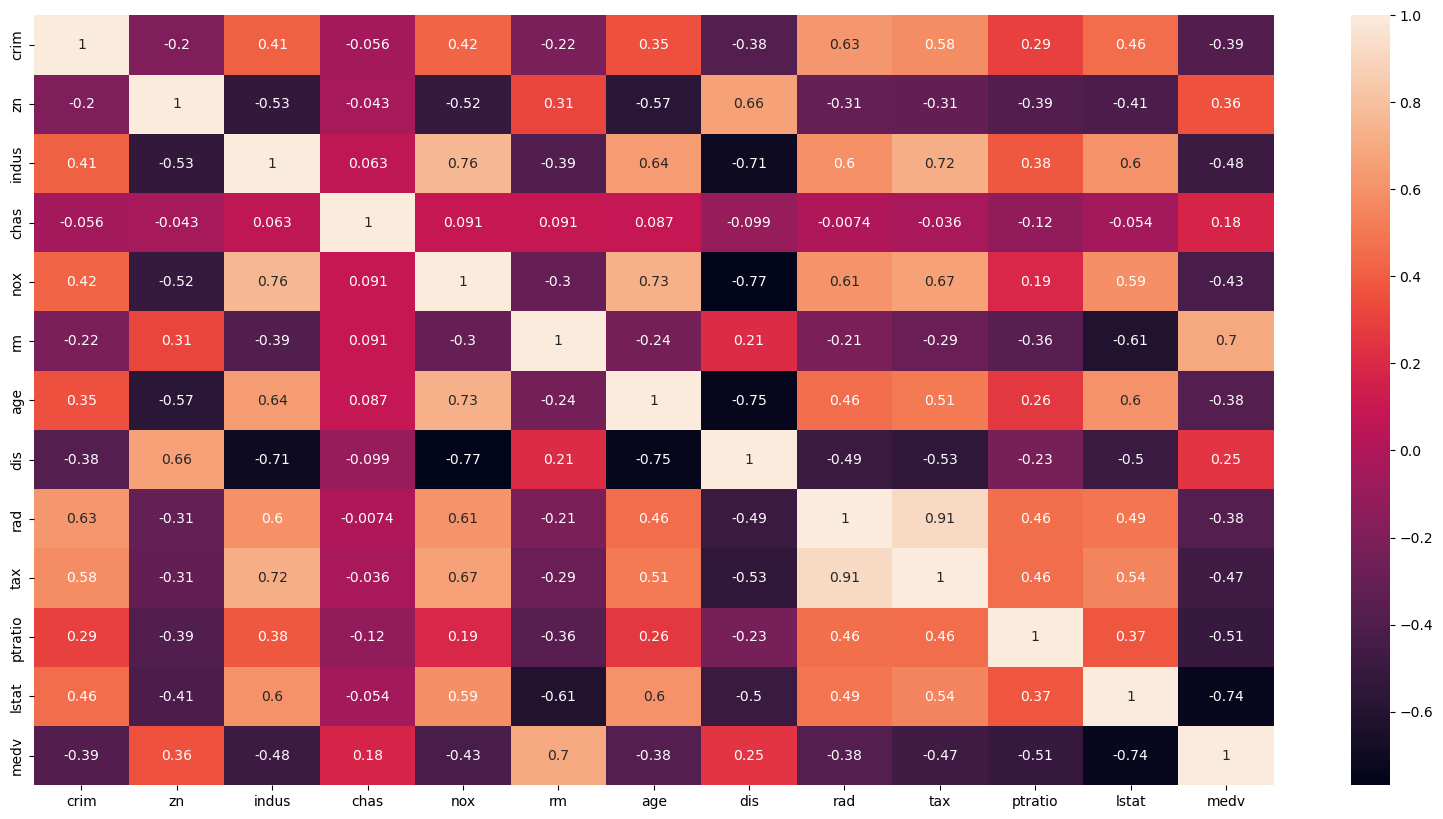

In [11]:
# for displaying the heatmap

plt.figure(figsize=(20,10))
sns.heatmap(boston.corr(), annot=True)

plt.show()

### For either case 1 or case 2, please indicate which features are included in the model training.

In [12]:
# CASE 1
# ALL FEATURES WITH A CORRELATION COEFFIECIENT OF 0.45 WITH THE OUTPUT VECTOR WILL BE INCLUDED

threshold = 0.45

selected_features = matrix[abs(matrix['medv']) >= threshold]['medv'].index.tolist()

# we do not need the medv feature in the feature matrix
selected_features.remove('medv')

# print to view the selected features
print(f'The selected features are: {selected_features}')


The selected features are: ['indus', 'rm', 'tax', 'ptratio', 'lstat']


## <font color=green>5. Training a Multiple Linear Regression Model</font>

### <font color=green>5.1 Select the Feature Data for Training & Test</font>



In [13]:
# only select the features with a correlation greater than the threshold value
X_train, X_test = X_train[selected_features], X_test[selected_features]

In [14]:
# view the training dataset
X_train.head()

,indus,rm,tax,ptratio,lstat
13,-0.437258,-0.478164,-0.601276,1.176466,-0.615792
61,-0.876445,-0.453945,-0.737880,0.575395,0.250482
377,1.015999,0.725672,1.530926,0.806576,1.203663
39,-1.194528,0.442165,-0.927937,-0.071913,-1.168077
365,1.015999,-3.880249,1.530926,0.806576,-0.775590


In [15]:
# view the testing set
X_test.head()

,indus,rm,tax,ptratio,lstat
307,-1.306878,0.804028,-1.106115,-0.025677,-0.718119
343,-1.073423,0.586056,-0.227101,-0.395567,-0.767180
47,-0.616727,-0.362767,-1.040783,-0.256858,0.861639
67,-0.739290,-0.579315,-0.375583,0.205505,-0.638220
362,1.015999,-1.314439,1.530926,0.806576,-0.345257


### <font color=green>5.2 Train the Model Using Scikit Learn LinearRegression</font>

In [16]:
# initialize the object
lr = LinearRegression()

In [17]:
# start training
lr.fit(X_train, Y_train)

LinearRegression()

### Please print out the weights of the model

In [18]:
a0 = lr.intercept_
a = lr.coef_

print(f'The weights are: \na0 = {a0:.4f}')

for i, x in enumerate(a): print(f'a{i+1} = {x:.4f}')

The weights are: 
a0 = 22.6307
a1 = 0.2205
a2 = 2.5105
a3 = -0.2115
a4 = -1.9899
a5 = -4.3389


### Prediction of the Test Data by the Model

In [19]:
y_pred = lr.predict(X_test)

### Visualize the Prediction vs. Test Data

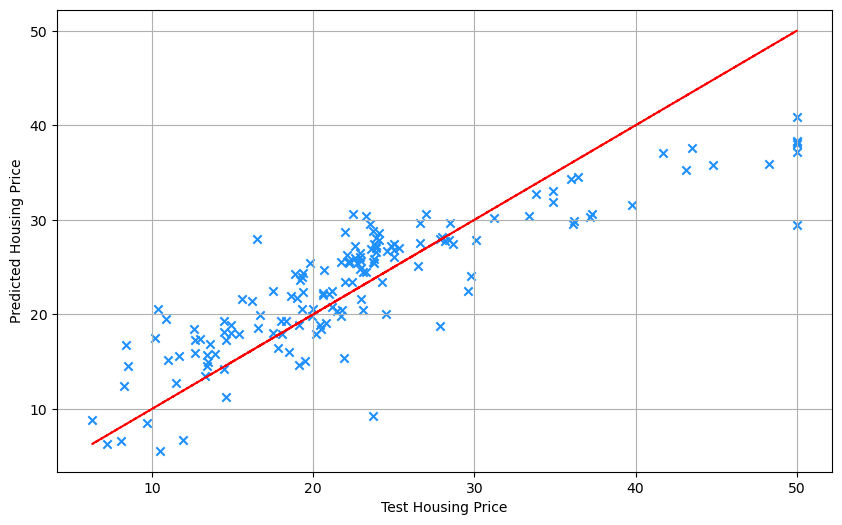

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, y_pred, marker='x', color='DodgerBlue')
plt.plot(Y_test, Y_test, linestyle='--', color='red')     # The ideal line (perfect prediction)
plt.xlabel("Test Housing Price")
plt.ylabel("Predicted Housing Price")
plt.grid()
plt.show()

### Residual Error Histogram 
This demonstrates the estimation error between the prediction and the test data

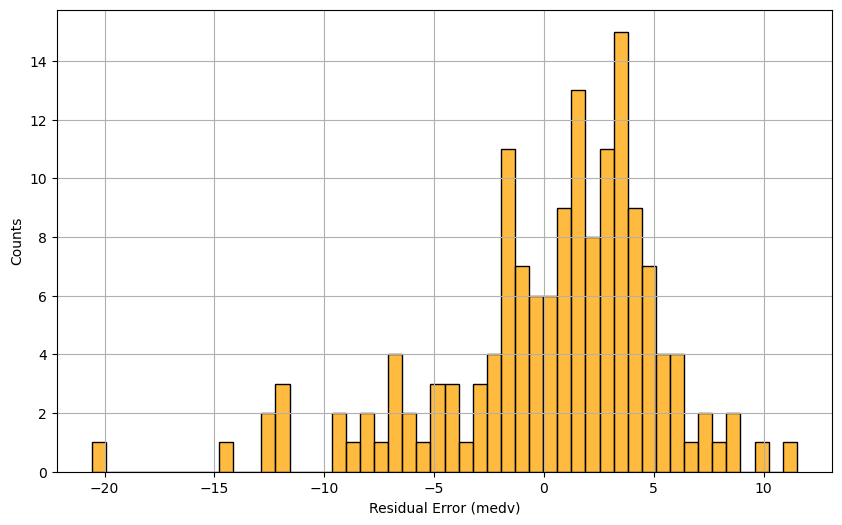

In [21]:
plt.figure(figsize=(10,6))
sns.histplot((y_pred - Y_test), bins=50, color='orange')

plt.xlabel("Residual Error (medv)")
plt.ylabel("Counts")
plt.grid()
plt.show()

### Statistical Distribution of the Risidual Errors

In [22]:
y_error = y_pred - Y_test

y_error_mean = np.mean(y_error)
y_error_std = np.std(y_error)

print ("Residual Error Distribution:")
print (f"Mean of the prediction error = {y_error_mean:.3f}")
print (f"Std of the prediction error = {y_error_std:.3f}")

Residual Error Distribution:
Mean of the prediction error = 0.326
Std of the prediction error = 5.004


## <font color=green>6. Regression Model Evaluation 
    
### For each case, show the results for the evaluation metrics, RMSE and $R^2$

In [23]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
r2 = metrics.r2_score(Y_test, y_pred)

In [24]:
print('Results of the evaluation metrics are:')
print(f'RMSE: {rmse:.4f} \nr2: {r2:.4f}')

Results of the evaluation metrics are:
RMSE: 5.0148 
r2: 0.7256


###  Question: What about the prediction error for the <font color=blue>training data?  </font>

In [25]:
y_train_pred = lr.predict(X_train)

rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
r2_train = metrics.r2_score(Y_train, y_train_pred)

print ("Comparing Prediction Performance between Training and Test Data")

print ("---------------------------------")
print('               RMSE               ')
print ("---------------------------------")

print (f"RMSE (Training) = {rmse_train:.4f}")
print (f"RMSE (Test) = {rmse:.4f}")

print ("---------------------------------")
print('                r2                ')
print ("---------------------------------")

print (f"r2 (Training) = {r2_train:.4f}")
print (f"r2 (Test) = {r2:.4f}")

Comparing Prediction Performance between Training and Test Data
---------------------------------
               RMSE               
---------------------------------
RMSE (Training) = 5.3227
RMSE (Test) = 5.0148
---------------------------------
                r2                
---------------------------------
r2 (Training) = 0.6511
r2 (Test) = 0.7256


### Please make a comment on how this new model performs, in comparison with the baseline two-feature model.

The testing R-squared model for case 1 is slightly better than that of the baseline model. This could be because there are more features involved in this model, hence, more things to learn from. 
Similarly, the RMSE for case 1 is also only slightly better than that of the baseline model.

However, looking at the $r^2$ value for case 1, it seems that the model is performing better than the baseline model.

Furthermore, it can also be said that there is no overfitting or underfitting since for both the performance metrics, $r^2$ and RMSE, the training and testing values are not that far away.